# SI 330 Final Project Phase 3: eiGO Analysis - Aayana Anand

## Data Preparation
- Importing Packages
- Cleaning
- Examining

In [23]:
# Import all necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import regex as re
from scipy.stats import f_oneway
import seaborn as sns

In [32]:
# Read in EPA Data (information about Greenhouse Gas Emissions)
df_EPA_Greenhouse_Gases = pd.read_csv('data/ghgp_direct_emitters_2022.csv')
df_EPA_Greenhouse_Gases.shape

(8659, 25)

In [33]:
# Read in NTSIP Data (information about Substance Emissions)
df_NTSIP_Substances = pd.read_csv('data/NTSIP_Public_Use_Data_2013.csv')
df_NTSIP_Substances.shape

(3131, 90)

In [35]:
# Read in US Census Data (information about Demographics)
df_Census = pd.read_csv('data/ACSCP1Y2022.CP05-2024-03-09T205618.csv')
df_Census.shape

(96, 469)

In [36]:
# Merge the EPA and NTSIP Data on State
merged_environmental_df = df_EPA_Greenhouse_Gases.merge(df_NTSIP_Substances, left_on='State', right_on='STATE')
merged_environmental_df.shape
# We will mostly use this data frame going forward

(894207, 115)

In [37]:
# Drop columns we won't be using (for storage and efficiency purposes in Vocareum)
merged_environmental_df.drop(['CHEM1','CHM_QCAT1','CHM_UNIT1','RELS1CHEM1','RELS2CHEM1','CHEM2','CHM_QCAT2','CHM_UNIT2','RELS1CHEM2','RELS2CHEM2',
                               'CHEM3','CHM_QCAT3','CHM_UNIT3','RELS1CHEM3','RELS2CHEM3','CHEM4','CHM_QCAT4','CHM_UNIT4','RELS1CHEM4','RELS2CHEM4','CHEM5',
                               'CHM_QCAT5','CHM_UNIT5','RELS1CHEM5','RELS2CHEM5','CHEM6','CHM_QCAT6','CHM_UNIT6','RELS1CHEM6','RELS2CHEM6','TOT_VICT',
                               'TOT_FATAL','AGE_CAT1','AGE_CAT2','VICT_EMP','VICT_RESP','VICT_GP','VICT_STD','INJ_TRA','INJ_RESP','INJ_EYE','INJ_GASTRO',
                               'INJ_HEAT','INJ_BURN','INJ_SKIN','INJ_CNS','INJ_HACHE','INJ_HRT','INJ_SOB','SEV_HOSPA','SEV_HOSPR','SEV_NHOSP','VDCON_SN',
                               'VDCON_MF','VDCON_BOTH'], axis=1, inplace=True)
merged_environmental_df.shape

(894207, 60)

In [38]:
# Save the merged data frame as a file for reference
merged_environmental_df.to_csv('data/merged_environmental_data.csv')

## See how the Distribution of Substance Category Varies across States
- Select the Substance Categories we're interested in (and filter the data frame accordingly)
- Group the data frame by both ‘State’ and ‘SUB_CAT’ to prepare for a stacked bar chart visualization
- Plot stacked bar chart

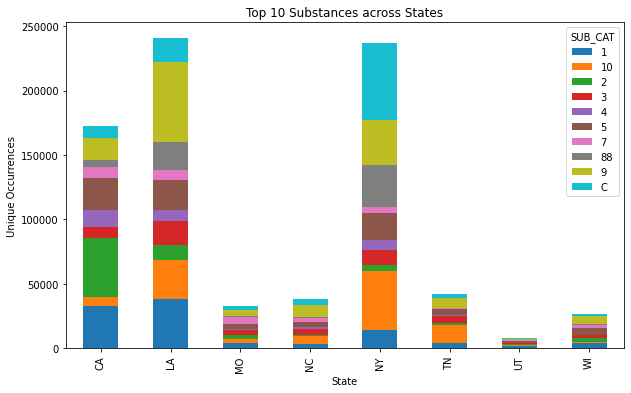

In [43]:
# Collect all of the unique Substance Categories
all_subcats = merged_environmental_df['SUB_CAT'].value_counts()

# Select the top 10 most Common Substance Categories
top_5_subcats = list(all_subcats.head(10).index) # We focus on the top 10 to make analysis and visualizations easier to understand!

# Filter the data frame to include only these 10 Substance Categories
filtered_df = merged_environmental_df[merged_environmental_df['SUB_CAT'].isin(top_5_subcats)]

# Group by State and SUB_CAT
subcat_by_state = filtered_df.groupby(['State', 'SUB_CAT']).size()

# Plot Stacked Bar Chart
ax = subcat_by_state.unstack().plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Top 10 Substances across States')
plt.xlabel('State')
plt.ylabel('Unique Occurrences')

plt.legend(title='SUB_CAT')

plt.show()

## See how the Distribution of Substance Category varies across Area Types
- Select the Substance Categories we're interested in (and filter the data frame accordingly)
- Group the data frame by both ‘AREATYP1’ and ‘SUB_CAT’ to prepare for a stacked bar chart visualization
- Plot stacked bar chart

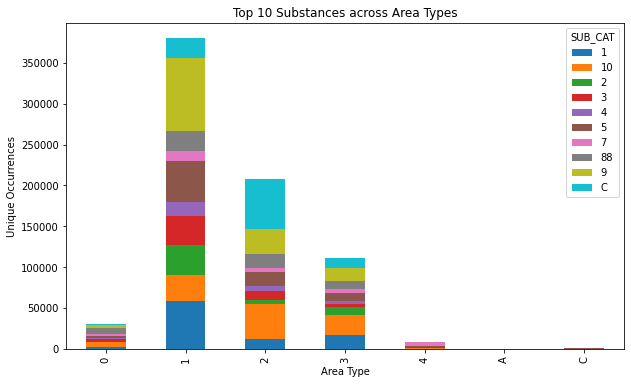

In [46]:
# We can continue using the filtered data frame from above!

# Group by AREATYP1 and SUB_CAT
subcat_by_areatype = filtered_df.groupby(['AREATYP1', 'SUB_CAT']).size()

# Plot Stacked Bar Chart
ax = subcat_by_areatype.unstack().plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Top 10 Substances across Area Types')
plt.xlabel('Area Type')
plt.ylabel('Unique Occurrences')

plt.legend(title='SUB_CAT')

plt.show()

## See how Mean Greenhouse Gas Emissions vary across States from 2011-2022
- Group the dataframe by the ‘State’ and ‘Year’ columns
- Aggregate the respective means for each year across each state
- Plot these findings using a multi-line plot, visualizing each state with it’s own line on the same graph

In [47]:
# Use regex to generate a list of the emissions columns
pattern = r'[0-9]{4} Total reported direct emissions'
emissions_cols_11_to_22 = [col for col in merged_environmental_df.columns if pd.isnull(re.search(pattern, col))==False]
emissions_cols_11_to_22

['2022 Total reported direct emissions',
 '2021 Total reported direct emissions',
 '2020 Total reported direct emissions',
 '2019 Total reported direct emissions',
 '2018 Total reported direct emissions',
 '2017 Total reported direct emissions',
 '2016 Total reported direct emissions',
 '2015 Total reported direct emissions',
 '2014 Total reported direct emissions',
 '2013 Total reported direct emissions',
 '2012 Total reported direct emissions',
 '2011 Total reported direct emissions']

In [48]:
# Use the emissions columns list on a groupby object to find the mean emissions for all available states across the years
mean_ggs_by_state_df = merged_environmental_df.groupby('State')[emissions_cols_11_to_22].mean()
mean_ggs_by_state_df

,2022 Total reported direct emissions,2021 Total reported direct emissions,2020 Total reported direct emissions,2019 Total reported direct emissions,2018 Total reported direct emissions,2017 Total reported direct emissions,2016 Total reported direct emissions,2015 Total reported direct emissions,2014 Total reported direct emissions,2013 Total reported direct emissions,2012 Total reported direct emissions,2011 Total reported direct emissions
State,,,,,,,,,,,,
CA,251308.731749,248993.989693,239438.473872,238651.576926,239727.236837,233050.108756,232188.212046,246072.249389,237519.994047,232119.847130,231286.973434,213467.892093
LA,361978.819386,337174.863267,327332.133819,351978.377846,353078.352748,350712.512965,346568.226408,339541.483594,331913.169256,350255.406586,364433.308907,384477.304663
MO,670558.764330,690554.201613,636052.634879,666769.973551,724352.681477,774324.186590,682586.340502,685289.717590,740195.023821,778637.775496,761303.383036,839070.358885
NC,388815.969831,381634.718559,363407.926784,448320.621241,466897.189094,467096.697333,484077.716263,474864.579034,486141.636425,449405.153716,467247.580628,509711.739443
NY,189779.316063,178901.050360,170844.573529,162827.603871,179648.139885,166410.272893,189998.317917,195049.941378,194964.144013,196227.969630,209249.995760,217715.000321
TN,319562.121192,322140.176557,286500.803492,331371.561165,351796.354353,402563.615941,421056.378900,416252.271538,442846.465817,423117.629798,457664.821566,492698.789864
UT,524812.531655,565229.928148,495822.425639,540797.350355,550776.294302,541435.125965,547130.181459,549073.018329,565490.491811,562216.260338,528111.041883,563220.176659
WI,305299.100140,346733.274734,312305.539473,332964.985831,379864.929474,400548.239282,380094.497939,403983.553624,367519.488930,394001.520411,345865.229688,379853.111654


In [49]:
# Change the columns to just years for the sake of analysis
years = [year for year in range(2022, 2010, -1)]
mean_ggs_by_state_df.columns = [year for year in years]
mean_ggs_by_state_df

,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
State,,,,,,,,,,,,
CA,251308.731749,248993.989693,239438.473872,238651.576926,239727.236837,233050.108756,232188.212046,246072.249389,237519.994047,232119.847130,231286.973434,213467.892093
LA,361978.819386,337174.863267,327332.133819,351978.377846,353078.352748,350712.512965,346568.226408,339541.483594,331913.169256,350255.406586,364433.308907,384477.304663
MO,670558.764330,690554.201613,636052.634879,666769.973551,724352.681477,774324.186590,682586.340502,685289.717590,740195.023821,778637.775496,761303.383036,839070.358885
NC,388815.969831,381634.718559,363407.926784,448320.621241,466897.189094,467096.697333,484077.716263,474864.579034,486141.636425,449405.153716,467247.580628,509711.739443
NY,189779.316063,178901.050360,170844.573529,162827.603871,179648.139885,166410.272893,189998.317917,195049.941378,194964.144013,196227.969630,209249.995760,217715.000321
TN,319562.121192,322140.176557,286500.803492,331371.561165,351796.354353,402563.615941,421056.378900,416252.271538,442846.465817,423117.629798,457664.821566,492698.789864
UT,524812.531655,565229.928148,495822.425639,540797.350355,550776.294302,541435.125965,547130.181459,549073.018329,565490.491811,562216.260338,528111.041883,563220.176659
WI,305299.100140,346733.274734,312305.539473,332964.985831,379864.929474,400548.239282,380094.497939,403983.553624,367519.488930,394001.520411,345865.229688,379853.111654


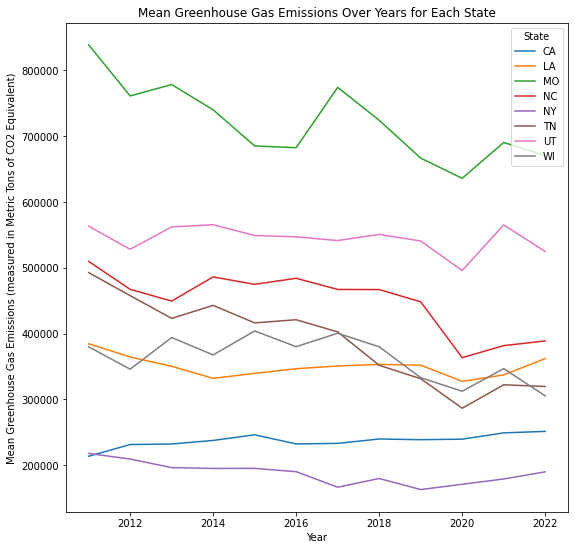

In [51]:
# Plot Multi-line Chart

plt.figure(figsize=(9, 9))

for state, emissions in mean_ggs_by_state_df.iterrows():
    plt.plot(emissions.index, emissions.values, label=state)

plt.xlabel('Year')
plt.ylabel('Mean Greenhouse Gas Emissions (measured in Metric Tons of CO2 Equivalent)')
plt.title('Mean Greenhouse Gas Emissions Over Years for Each State')

plt.legend(title='State')

plt.show()

## See how Mean Greenhouse Gas Emissions per State Resident vary across States from 2011-2022
- Obtain the Populations for each available State
- Relate the Populations to the Emissions for each State, calculating Emissions per State Resident
- Plot a new Multi-Line Chart

In [53]:
# Use regex to obtain just the population columns for the available States
pattern = r'\b(California|Louisiana|Missouri|North Carolina|New York|Tennessee|Utah|Wisconsin)\b{1}!![0-9]{4} Estimate'
population_cols_22_to_18 = [col for col in df_Census.columns if pd.isnull(re.search(pattern, col))==False]
population_cols_22_to_18 = df_Census[population_cols_22_to_18].iloc[1] # Save just the row for Total Population
population_cols_22_to_18

California!!2022 Estimate        39,029,342
California!!2021 Estimate        39,237,836
California!!2020 Estimate               (X)
California!!2019 Estimate        39,512,223
California!!2018 Estimate        39,557,045
Louisiana!!2022 Estimate          4,590,241
Louisiana!!2021 Estimate          4,624,047
Louisiana!!2020 Estimate                (X)
Louisiana!!2019 Estimate          4,648,794
Louisiana!!2018 Estimate          4,659,978
Missouri!!2022 Estimate           6,177,957
Missouri!!2021 Estimate           6,168,187
Missouri!!2020 Estimate                 (X)
Missouri!!2019 Estimate           6,137,428
Missouri!!2018 Estimate           6,126,452
New York!!2022 Estimate          19,677,151
New York!!2021 Estimate          19,835,913
New York!!2020 Estimate                 (X)
New York!!2019 Estimate          19,453,561
New York!!2018 Estimate          19,542,209
North Carolina!!2022 Estimate    10,698,973
North Carolina!!2021 Estimate    10,551,162
North Carolina!!2020 Estimate   

In [54]:
# Filter just the Greenhouse Gas Emission columns that line up with the census years
mean_ggs_by_state_df_22_to_18 = mean_ggs_by_state_df[[2022, 2021, 2020, 2019, 2018]]
mean_ggs_by_state_df_22_to_18

,2022,2021,2020,2019,2018
State,,,,,
CA,251308.731749,248993.989693,239438.473872,238651.576926,239727.236837
LA,361978.819386,337174.863267,327332.133819,351978.377846,353078.352748
MO,670558.764330,690554.201613,636052.634879,666769.973551,724352.681477
NC,388815.969831,381634.718559,363407.926784,448320.621241,466897.189094
NY,189779.316063,178901.050360,170844.573529,162827.603871,179648.139885
TN,319562.121192,322140.176557,286500.803492,331371.561165,351796.354353
UT,524812.531655,565229.928148,495822.425639,540797.350355,550776.294302
WI,305299.100140,346733.274734,312305.539473,332964.985831,379864.929474


In [62]:
# Write a small function to clean the population data
def clean_pop_data(num):
    if pd.isnull(num) or num == '(X)':
        return pd.NA
    else:
        return float(str(num).replace(',',''))

# Apply the function to the selected columns
population_cols_22_to_18 = population_cols_22_to_18.apply(clean_pop_data)
population_cols_22_to_18

California!!2022 Estimate        39029342.0
California!!2021 Estimate        39237836.0
California!!2020 Estimate              <NA>
California!!2019 Estimate        39512223.0
California!!2018 Estimate        39557045.0
Louisiana!!2022 Estimate          4590241.0
Louisiana!!2021 Estimate          4624047.0
Louisiana!!2020 Estimate               <NA>
Louisiana!!2019 Estimate          4648794.0
Louisiana!!2018 Estimate          4659978.0
Missouri!!2022 Estimate           6177957.0
Missouri!!2021 Estimate           6168187.0
Missouri!!2020 Estimate                <NA>
Missouri!!2019 Estimate           6137428.0
Missouri!!2018 Estimate           6126452.0
New York!!2022 Estimate          19677151.0
New York!!2021 Estimate          19835913.0
New York!!2020 Estimate                <NA>
New York!!2019 Estimate          19453561.0
New York!!2018 Estimate          19542209.0
North Carolina!!2022 Estimate    10698973.0
North Carolina!!2021 Estimate    10551162.0
North Carolina!!2020 Estimate   

In [64]:
# Translate the Census Population data into a data frame with the same format as the Greenhouse Gas Emissions data frame

state_abbreviations = {
    'CA':'California',
    'LA':'Louisiana',
    'MO':'Missouri',
    'NY':'New York',
    'NC':'North Carolina',
    'TN':'Tennessee',
    'UT':'Utah',
    'WI':'Wisconsin',
}

# Begin generating a new data frame with populations
state_population_df_22_to_18 = {}

for year in mean_ggs_by_state_df_22_to_18.columns:
    key = year
    values = []
    
    for state in mean_ggs_by_state_df_22_to_18.index:
        state_ref = state_abbreviations[state] # use the keys above to map the state names to their abbreviations
        col_ref = f'{state_ref}!!{year} Estimate' # use strings to connect the state and year to the column in the census data
        
        values.append(population_cols_22_to_18[col_ref]) # append populations to temporary list

        state_population_df_22_to_18[year] = values # use key and list to create data frame
    
state_population_df_22_to_18 = pd.DataFrame(state_population_df_22_to_18, index=state_abbreviations.keys())
state_population_df_22_to_18

,2022,2021,2020,2019,2018
CA,39029342.0,39237836.0,<NA>,39512223.0,39557045.0
LA,4590241.0,4624047.0,<NA>,4648794.0,4659978.0
MO,6177957.0,6168187.0,<NA>,6137428.0,6126452.0
NY,10698973.0,10551162.0,<NA>,10488084.0,10383620.0
NC,19677151.0,19835913.0,<NA>,19453561.0,19542209.0
TN,7051339.0,6975218.0,<NA>,6829174.0,6770010.0
UT,3380800.0,3337975.0,<NA>,3205958.0,3161105.0
WI,5892539.0,5895908.0,<NA>,5822434.0,5813568.0


In [65]:
# Verify that our dataframes are the same size before we calculate anything
mean_ggs_by_state_df_22_to_18.shape == state_population_df_22_to_18.shape

True

In [66]:
# Complete data frame division (mean emissions / population)
mean_ggs_by_state_resident_df_22_to_18 = (mean_ggs_by_state_df_22_to_18 / state_population_df_22_to_18)
mean_ggs_by_state_resident_df_22_to_18

,2022,2021,2020,2019,2018
CA,0.006439,0.006346,<NA>,0.006040,0.006060
LA,0.078858,0.072918,<NA>,0.075714,0.075768
MO,0.108541,0.111954,<NA>,0.108640,0.118234
NC,0.019760,0.019240,<NA>,0.023046,0.023892
NY,0.017738,0.016956,<NA>,0.015525,0.017301
TN,0.045319,0.046184,<NA>,0.048523,0.051964
UT,0.155233,0.169333,<NA>,0.168685,0.174235
WI,0.051811,0.058809,<NA>,0.057187,0.065341


In [67]:
# Drop the NA column for the sake of plotting
mean_ggs_by_state_resident_df_22_to_18.drop(2020, axis=1, inplace=True)
mean_ggs_by_state_resident_df_22_to_18 = mean_ggs_by_state_resident_df_22_to_18.reindex(columns=[2018, 2019, 2021, 2022])
mean_ggs_by_state_resident_df_22_to_18

,2018,2019,2021,2022
CA,0.006060,0.006040,0.006346,0.006439
LA,0.075768,0.075714,0.072918,0.078858
MO,0.118234,0.108640,0.111954,0.108541
NC,0.023892,0.023046,0.019240,0.019760
NY,0.017301,0.015525,0.016956,0.017738
TN,0.051964,0.048523,0.046184,0.045319
UT,0.174235,0.168685,0.169333,0.155233
WI,0.065341,0.057187,0.058809,0.051811


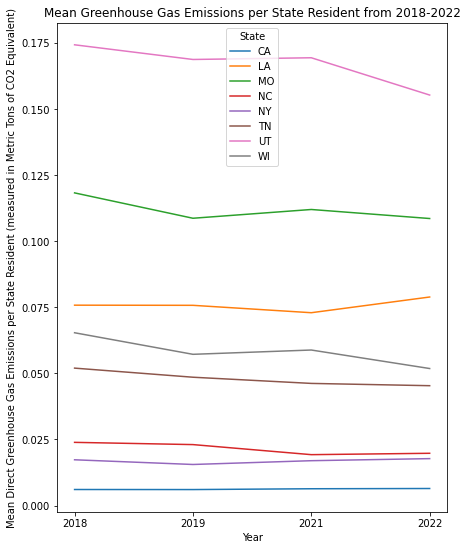

In [68]:
# Plot Multi-line Chart
plt.figure(figsize=(7, 9))

for state, emissions in mean_ggs_by_state_resident_df_22_to_18.iterrows():
    idx_strings = emissions.index.astype(str)
    plt.plot(idx_strings, emissions.values, label=state)

plt.xlabel('Year')
plt.ylabel('Mean Direct Greenhouse Gas Emissions per State Resident (measured in Metric Tons of CO2 Equivalent)')
plt.title('Mean Greenhouse Gas Emissions per State Resident from 2018-2022')

plt.legend(title='State')

plt.show()

## See how the Distribution of Area Types varies across States
- Group the dataframe by the ‘State’ and 'AREATYP1' columns
- Plot Stacked Bar Chart


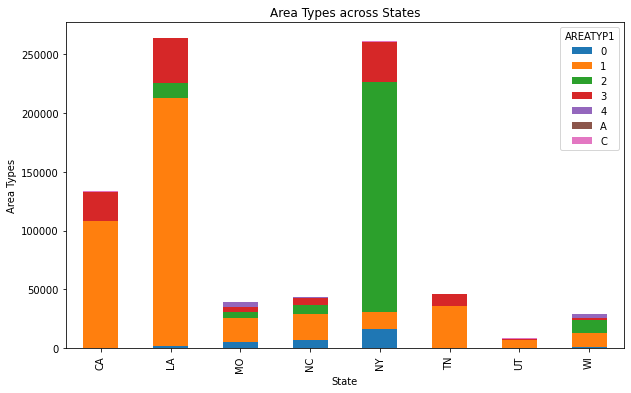

In [69]:
areatype_by_state = merged_environmental_df.groupby(['State', 'AREATYP1']).size()

ax = areatype_by_state.unstack().plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Area Types across States')
plt.xlabel('State')
plt.ylabel('Area Types')

plt.legend(title='AREATYP1')

plt.show()

## Measure the Relationship between Substances and CO2 Emissions
- Conduct an ANOVA test to see how the numeric mean emissions values change across the categorical substance categories
- Plot Boxplot to visualize relationship between numeric and categorical variables

In [73]:
# Create a new data frame that combines the emissions columns and the SUB_CAT column
substances_and_emissions_df = merged_environmental_df[emissions_cols_11_to_22]
substances_and_emissions_df['SUB_CAT'] = merged_environmental_df['SUB_CAT']
substances_and_emissions_df.dropna(inplace=True) #drop NAs to help with calculations

/tmp/ipykernel_176/2713652939.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  substances_and_emissions_df['SUB_CAT'] = merged_environmental_df['SUB_CAT']
/tmp/ipykernel_176/2713652939.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  substances_and_emissions_df.dropna(inplace=True) #drop NAs to help with calculations


In [74]:
# Calculate f-statistics and p-values for each column
for col in substances_and_emissions_df.columns[:-1]:
    f_statistic, p_value = f_oneway(*[group[col] for name, group in substances_and_emissions_df.groupby('SUB_CAT')])
    print(f"ANOVA for {col}:{f_statistic}, {p_value}")
    
# There is a significant difference in Mean Total Direct Emissions across Substance Categories for all Years
# There is a significant correlation between Mean Total Direct Emissions and Substance Categories for all Years

ANOVA for 2022 Total reported direct emissions:46.921954435361556, 1.8830064625971767e-158
ANOVA for 2021 Total reported direct emissions:50.93409254407182, 5.656000521498984e-173
ANOVA for 2020 Total reported direct emissions:52.37520319344729, 3.401110089365054e-178
ANOVA for 2019 Total reported direct emissions:56.93487194758796, 9.970662498014656e-195
ANOVA for 2018 Total reported direct emissions:53.38205630025922, 7.632112079815232e-182
ANOVA for 2017 Total reported direct emissions:55.86252401447421, 7.739970419154645e-191
ANOVA for 2016 Total reported direct emissions:43.489126659584784, 4.82011515753245e-146
ANOVA for 2015 Total reported direct emissions:40.80941813095649, 2.2703205907898637e-136
ANOVA for 2014 Total reported direct emissions:42.174832588564826, 2.6843611887236933e-141
ANOVA for 2013 Total reported direct emissions:42.952433392492956, 4.1816419242534774e-144
ANOVA for 2012 Total reported direct emissions:38.748821988226354, 6.101334987640721e-129
ANOVA for 201

<AxesSubplot: xlabel='SUB_CAT', ylabel='2022 Total reported direct emissions'>

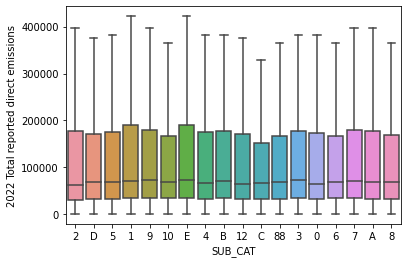

In [75]:
# Plot Boxplot for 2022 Mean Greenhouse Gas Emissions across all substance categories
sns.boxplot(y='2022 Total reported direct emissions', x='SUB_CAT', data=substances_and_emissions_df, showfliers=False)